### linear regression in 1 variable
https://jax.readthedocs.io/en/latest/jax-101/01-jax-basics.html

In [8]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

In [9]:
## dummy data
size = 100
xs = np.stack([np.ones(size,), np.random.normal(size=(size,))]).T
noise = np.random.normal(scale=0.3, size=(size,))
# intercept, slope
theta = np.array([3, 10]).astype(np.float32)  #@param

ys = np.dot(xs, theta) + noise

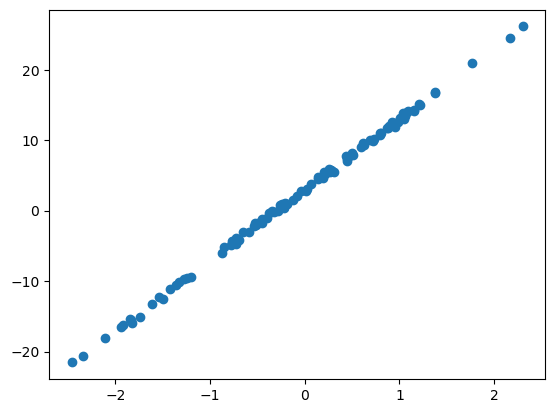

In [10]:
plt.scatter(xs[:, 1], ys)

In [11]:
params = {
    'theta': theta
}
data = {'x': xs, 'y': ys}

In [12]:
## model function
def model(params, x):
    y = jnp.dot(x, params['theta'])
    return y

In [13]:
## loss function
def sum_squared_error(params, x, y):
    preds = model(params, x)
    return jnp.mean((y - preds) ** 2), preds


def update(params, grads, lr=0.1):
    return {
        'theta': params['theta'] - lr * grads['theta']
    }

In [21]:
## training loop
# initial estimates
params = {
    'theta': jnp.array([0, 0], dtype=jnp.float32)
}

# hyperparmeters
max_steps = 100
eps = 1e-4

step = 0

# until we reach max_steps or the loss doesn't change by <eps>
while step < max_steps:
    # compute model value and grad
    (loss, preds), grads = jax.value_and_grad(sum_squared_error, has_aux=True)(params, xs, ys)


    print(loss, params)
    print(grads)
    params_ = update(params, grads)
    print(params_)

    if jnp.mean(jnp.abs(params['theta'] - params_['theta'])) < eps:
        break
    params = params_
    step += 1
    # # check diff 
    # prev_loss, diff = loss, jnp.abs(prev_loss - loss)

111.311844 {'theta': Array([0., 0.], dtype=float32)}
{'theta': Array([ -5.017593, -20.700048], dtype=float32)}
{'theta': Array([0.5017593, 2.070005 ], dtype=float32)}
70.58372 {'theta': Array([0.5017593, 2.070005 ], dtype=float32)}
{'theta': Array([ -4.215905, -16.412554], dtype=float32)}
{'theta': Array([0.92334986, 3.7112603 ], dtype=float32)}
44.800926 {'theta': Array([0.92334986, 3.7112603 ], dtype=float32)}
{'theta': Array([ -3.5327516, -13.015424 ], dtype=float32)}
{'theta': Array([1.276625 , 5.0128026], dtype=float32)}
28.467113 {'theta': Array([1.276625 , 5.0128026], dtype=float32)}
{'theta': Array([ -2.9531054, -10.323296 ], dtype=float32)}
{'theta': Array([1.5719357, 6.045132 ], dtype=float32)}
18.111729 {'theta': Array([1.5719357, 6.045132 ], dtype=float32)}
{'theta': Array([-2.4631393, -8.189483 ], dtype=float32)}
{'theta': Array([1.8182496, 6.8640804], dtype=float32)}
11.541755 {'theta': Array([1.8182496, 6.8640804], dtype=float32)}
{'theta': Array([-2.0503612, -6.497901 ]

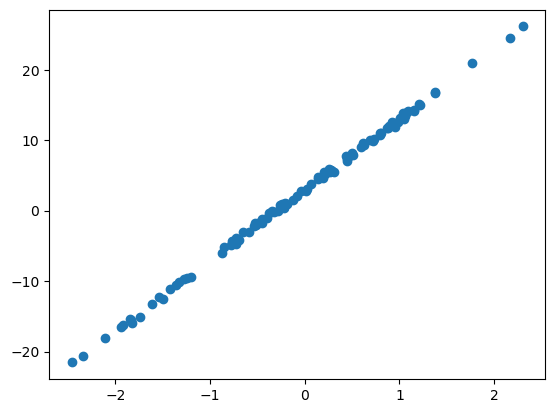

In [15]:
plt.scatter(xs[:,1], ys)

In [16]:
preds

Array([ 12.493873  ,  -9.028587  ,  24.72115   ,   2.5702012 ,
        12.211575  ,   8.909809  ,  13.05019   ,   0.14888489,
        -2.2764556 ,  -1.7118025 ,   3.2784672 ,   0.56862575,
       -20.479805  ,   0.7529783 ,   9.879304  ,  -0.24742165,
         2.1437247 ,   7.4998655 ,   3.1642702 ,   9.261934  ,
        13.566552  ,  -4.7826204 ,   3.6496117 ,   0.39202818,
         1.1571431 ,   8.13287   ,  -2.3310342 ,  -2.1470547 ,
       -14.472023  , -13.227813  ,  12.465737  ,  20.67532   ,
        11.651318  ,  15.13962   , -11.997861  ,   0.86735797,
         5.812044  , -15.537364  ,  14.569936  ,  10.9486    ,
        -1.535847  ,   7.6793203 ,  11.936093  ,  -4.336235  ,
        -9.746168  ,   9.202869  ,  -3.9970396 ,  -1.048643  ,
        13.346671  ,   4.423552  ,  13.7668    ,  -0.80229515,
       -12.461527  , -16.431646  , -15.33582   ,  -4.2834773 ,
        -9.4483795 , -11.227207  ,  16.827394  ,  -4.6452928 ,
        -1.5389682 ,   5.673973  ,  10.348031  ,  14.59

In [17]:
grads

{'theta': Array([-0.0008014 , -0.00090295], dtype=float32)}

In [18]:
theta

array([ 3., 10.], dtype=float32)

In [20]:
params

{'theta': Array([ 2.9969   , 10.0203085], dtype=float32)}